In [2]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!pip install gmaps
!jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [3]:
%matplotlib notebook

In [4]:
# Dependencies
import openweathermapy.core as owm
# Dependencies
import requests
import random
#from config import api_key
from config import gkey
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import gmaps
# Configure gmaps
gmaps.configure(api_key=gkey)
from us import states


In [46]:
#tripdata_file = "RideShare_Data_201801.csv"

#src_df = pd.read_csv(tripdata_file)

#src_df

In [5]:
Jan = pd.read_csv("RideShare_Data_201801.csv", parse_dates=[0], low_memory=False)
Feb = pd.read_csv("RideShare_Data_201802.csv", parse_dates=[0], low_memory=False)
Mar = pd.read_csv("RideShare_Data_201803.csv", parse_dates=[0], low_memory=False)
Apr = pd.read_csv("RideShare_Data_201804.csv", parse_dates=[0], low_memory=False)
May = pd.read_csv("RideShare_Data_201805.csv", parse_dates=[0], low_memory=False)
Jun = pd.read_csv("RideShare_Data_201806.csv", parse_dates=[0], low_memory=False)
Jul = pd.read_csv("RideShare_Data_201807.csv", parse_dates=[0], low_memory=False)
Aug = pd.read_csv("RideShare_Data_201808.csv", parse_dates=[0], low_memory=False)
Sep = pd.read_csv("RideShare_Data_201809.csv", parse_dates=[0], low_memory=False)
Oct = pd.read_csv("RideShare_Data_201810.csv", parse_dates=[0], low_memory=False)
Nov = pd.read_csv("RideShare_Data_201811.csv", parse_dates=[0], low_memory=False)
Dec = pd.read_csv("RideShare_Data_201812.csv", parse_dates=[0], low_memory=False)
src_df = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])


In [6]:
src_df["week_day"] =pd.to_datetime(src_df["Pickup_DateTime"]).dt.dayofweek

src_df.head()
src_df["week_day"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [7]:
def fdayofweek(x):
    return {
        0:'Monday',
        1:'Tuesday',
        2:'Wednesday',
        3:'Thrusday',
        4:'Friday',
        5:'Saturday',
        6:'Sunday',
     }.get(x, "NA")



src_df["week_day_name"]= src_df["week_day"].apply(fdayofweek)
src_df["week_day_name"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [8]:
src_df["hours"] =pd.to_datetime(src_df["Pickup_DateTime"]).dt.hour
src_df["hours"]

# Create bins in which to place values based upon TED Talk views
bins = [-1, 11, 12, 16, 17, 23]
       

# Create labels for these bins
group_labels = ["Morning", "Noon", "afternoon", "evening", "night"]

In [9]:
src_df["hours_group"]= pd.cut(src_df["hours"], bins, labels=group_labels)


In [10]:
src_df['weather_main'] = src_df['weather_main'].astype(str)
weather_grp_df = src_df.groupby(src_df['weather_main'])
weather_grp_df.head()


,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,Trip_Duration,Temp,humidity,wind_speed,weather_id,weather_main,weather_description,week_day,week_day_name,hours,hours_group
0,2018-01-01 22:22:03,2018-01-01 22:44:48,205.0,63.0,1.0,"Saint Albans, Queens","Cypress Hills, Brooklyn",11366,11216,22.750000,17,34,3,800,Clear,sky is clear,0,Monday,22,night
1,2018-01-01 12:44:06,2018-01-01 13:12:08,125.0,93.0,0.0,"Hudson Sq, Manhattan","Flushing Meadows-Corona Park, Queens",10024,11366,28.033333,6,60,2,800,Clear,sky is clear,0,Monday,12,Noon
2,2018-01-01 00:28:16,2018-01-01 00:41:23,39.0,71.0,1.0,"Canarsie, Brooklyn","East Flatbush/Farragut, Brooklyn",11216,11216,13.116667,11,43,4,800,Clear,sky is clear,0,Monday,0,Morning
3,2018-01-01 02:42:55,2018-01-01 02:56:46,100.0,137.0,0.0,"Garment District, Manhattan","Kips Bay, Manhattan",10024,10024,13.850000,9,46,5,800,Clear,sky is clear,0,Monday,2,Morning
4,2018-01-01 14:15:46,2018-01-01 14:37:55,55.0,115.0,0.0,"Coney Island, Brooklyn","Grymes Hill/Clifton, Staten Island",11216,10306,22.150000,8,60,2,800,Clear,sky is clear,0,Monday,14,afternoon
8121,2018-01-02 12:15:06,2018-01-02 12:38:52,238.0,232.0,0.0,"Upper West Side North, Manhattan","Two Bridges/Seward Park, Manhattan",10024,10024,23.766667,11,61,3,803,Clouds,broken clouds,1,Tuesday,12,Noon
8138,2018-01-02 11:54:39,2018-01-02 12:00:50,155.0,91.0,1.0,"Marine Park/Mill Basin, Brooklyn","Flatlands, Brooklyn",11234,11216,6.183333,11,61,3,803,Clouds,broken clouds,1,Tuesday,11,Morning
8143,2018-01-02 12:06:37,2018-01-02 12:10:13,35.0,35.0,0.0,"Brownsville, Brooklyn","Brownsville, Brooklyn",11216,11216,3.600000,11,61,3,803,Clouds,broken clouds,1,Tuesday,12,Noon
8145,2018-01-02 12:02:29,2018-01-02 12:21:53,170.0,161.0,0.0,"Murray Hill, Manhattan","Midtown Center, Manhattan",10024,10036,19.400000,11,61,3,803,Clouds,broken clouds,1,Tuesday,12,Noon
8174,2018-01-02 11:45:38,2018-01-02 12:08:25,61.0,181.0,1.0,"Crown Heights North, Brooklyn","Park Slope, Brooklyn",11216,11216,22.783333,11,61,3,803,Clouds,broken clouds,1,Tuesday,11,Morning


In [11]:
day_hrs = src_df.groupby(['hours_group','weather_main'])
day_hrs.count()
#(df.groupby(['cluster', 'org'], as_index=False).mean()
 #           .groupby('cluster')['time'].mean())
#weather_grp_df['hours_group'] .count()   

Pickup_DateTime  DropOff_datetime  PUlocationID  \
hours_group weather_main                                                    
Morning     Clear                364449.0          364449.0      364449.0   
            Clouds               247794.0          247794.0      247794.0   
            Drizzle               13618.0           13618.0       13618.0   
            Fog                   28901.0           28901.0       28901.0   
            Haze                   8105.0            8105.0        8105.0   
            Mist                 199105.0          199105.0      199105.0   
            Rain                 210397.0          210397.0      210397.0   
            Smoke                     NaN               NaN           NaN   
            Snow                  25250.0           25250.0       25250.0   
            Thunderstorm           5299.0            5299.0        5299.0   
Noon        Clear                 42045.0           42045.0       42045.0   
            Clouds                25778.0           25778.0       25778.0   
            Drizzle                1025.0            1025.0        1025.0   
            Fog                    2923.0            2923.0        2923.0   
            Haze                   5427.0            5427.0        5427.0   
            Mist                  21996.0           21996.0       21996.0   
            Rain                  24503.0           24503.0       24503.0   
            Smoke                     NaN               NaN           NaN   
            Snow                   2399.0            2399.0        2399.0   
            Thunderstorm            196.0             196.0         196.0   
afternoon   Clear                191217.0          191217.0      191217.0   
            Clouds               174552.0          174552.0      174552.0   
            Drizzle                5544.0            5544.0        5544.0   
            Fog                    1982.0            1982.0        1982.0   
            Haze                  28712.0           28712.0       28712.0   
            Mist                  44264.0           44264.0       44264.0   
            Rain                 102381.0          102381.0      102381.0   
            Smoke                   900.0             900.0         900.0   
            Snow                  18325.0           18325.0       18325.0   
            Thunderstorm           1394.0            1394.0        1394.0   
evening     Clear                 53098.0           53098.0       53098.0   
            Clouds                69476.0           69476.0       69476.0   
            Drizzle                1186.0            1186.0        1186.0   
            Fog                     227.0             227.0         227.0   
            Haze                   5822.0            5822.0        5822.0   
            Mist                   8223.0            8223.0        8223.0   
            Rain                  30642.0           30642.0       30642.0   
            Smoke                   215.0             215.0         215.0   
            Snow                   4645.0            4645.0        4645.0   
            Thunderstorm           2034.0            2034.0        2034.0   
night       Clear                325205.0          325205.0      325205.0   
            Clouds               406183.0          406183.0      406183.0   
            Drizzle                8482.0            8482.0        8482.0   
            Fog                    1597.0            1597.0        1597.0   
            Haze                  19281.0           19281.0       19281.0   
            Mist                  50418.0           50418.0       50418.0   
            Rain                 185332.0          185332.0      185332.0   
            Smoke                     NaN               NaN           NaN   
            Snow                  23265.0           23265.0       23265.0   
            Thunderstorm          15763.0           15763.0       15763.0   

                     

In [12]:
src_df['Pickup_ZipCode'].unique()

zip_grp_df = src_df.groupby(src_df['Pickup_ZipCode']).size().reset_index(name='count')
zip_grp_df


,Pickup_ZipCode,count
0,7114,383
1,10001,54294
2,10003,42948
3,10004,819
4,10007,38010
5,10009,13978
6,10013,28145
7,10017,34131
8,10019,24612
9,10022,24350


In [13]:
sorted_data_zip = zip_grp_df.sort_values("count", ascending = False)
top_10_zips = sorted_data_zip.head(10)
top_10_zips

,Pickup_ZipCode,count
10,10024,998735
37,11216,710315
44,11366,406937
25,10462,209576
14,10036,62975
1,10001,54294
2,10003,42948
4,10007,38010
46,11371,37262
21,10451,36313


In [14]:
top_10_zips['Lat'] = ""
top_10_zips['Lng'] = ""

C:\Users\mghan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mghan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
params = {"key": gkey}
for index, row in top_10_zips.iterrows():
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    zipcode = row['Pickup_ZipCode']
    #state = "NY"
    params['address'] = f"{zipcode}"
    response_city_state = requests.get(base_url, params=params).json()
    top_10_zips.loc[index, 'Lat'] = response_city_state["results"][0]["geometry"]["location"]["lat"]
    top_10_zips.loc[index, 'Lng'] = response_city_state["results"][0]["geometry"]["location"]["lng"]
    
    
top_10_zips  

C:\Users\mghan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Pickup_ZipCode,count,Lat,Lng
10,10024,998735,40.7859,-73.9742
37,11216,710315,40.6788,-73.9507
44,11366,406937,40.7284,-73.7875
25,10462,209576,40.8383,-73.8566
14,10036,62975,40.7603,-73.9933
1,10001,54294,40.7537,-73.9992
2,10003,42948,40.7323,-73.9874
4,10007,38010,40.7136,-74.0087
46,11371,37262,40.7766,-73.8743
21,10451,36313,40.8187,-73.9272


In [16]:
# Store 'Lat' and 'Lng' into  locations 
locations = top_10_zips [["Lat", "Lng"]].astype(float)
locations
# Convert Poverty Rate to float and store
ride_rate = top_10_zips["count"].astype(float)
ride_rate

10    998735.0
37    710315.0
44    406937.0
25    209576.0
14     62975.0
1      54294.0
2      42948.0
4      38010.0
46     37262.0
21     36313.0
Name: count, dtype: float64

In [17]:
# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [18]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [19]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=ride_rate, 
                                 dissipating=False, max_intensity=10,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

<IPython.core.display.Javascript object>


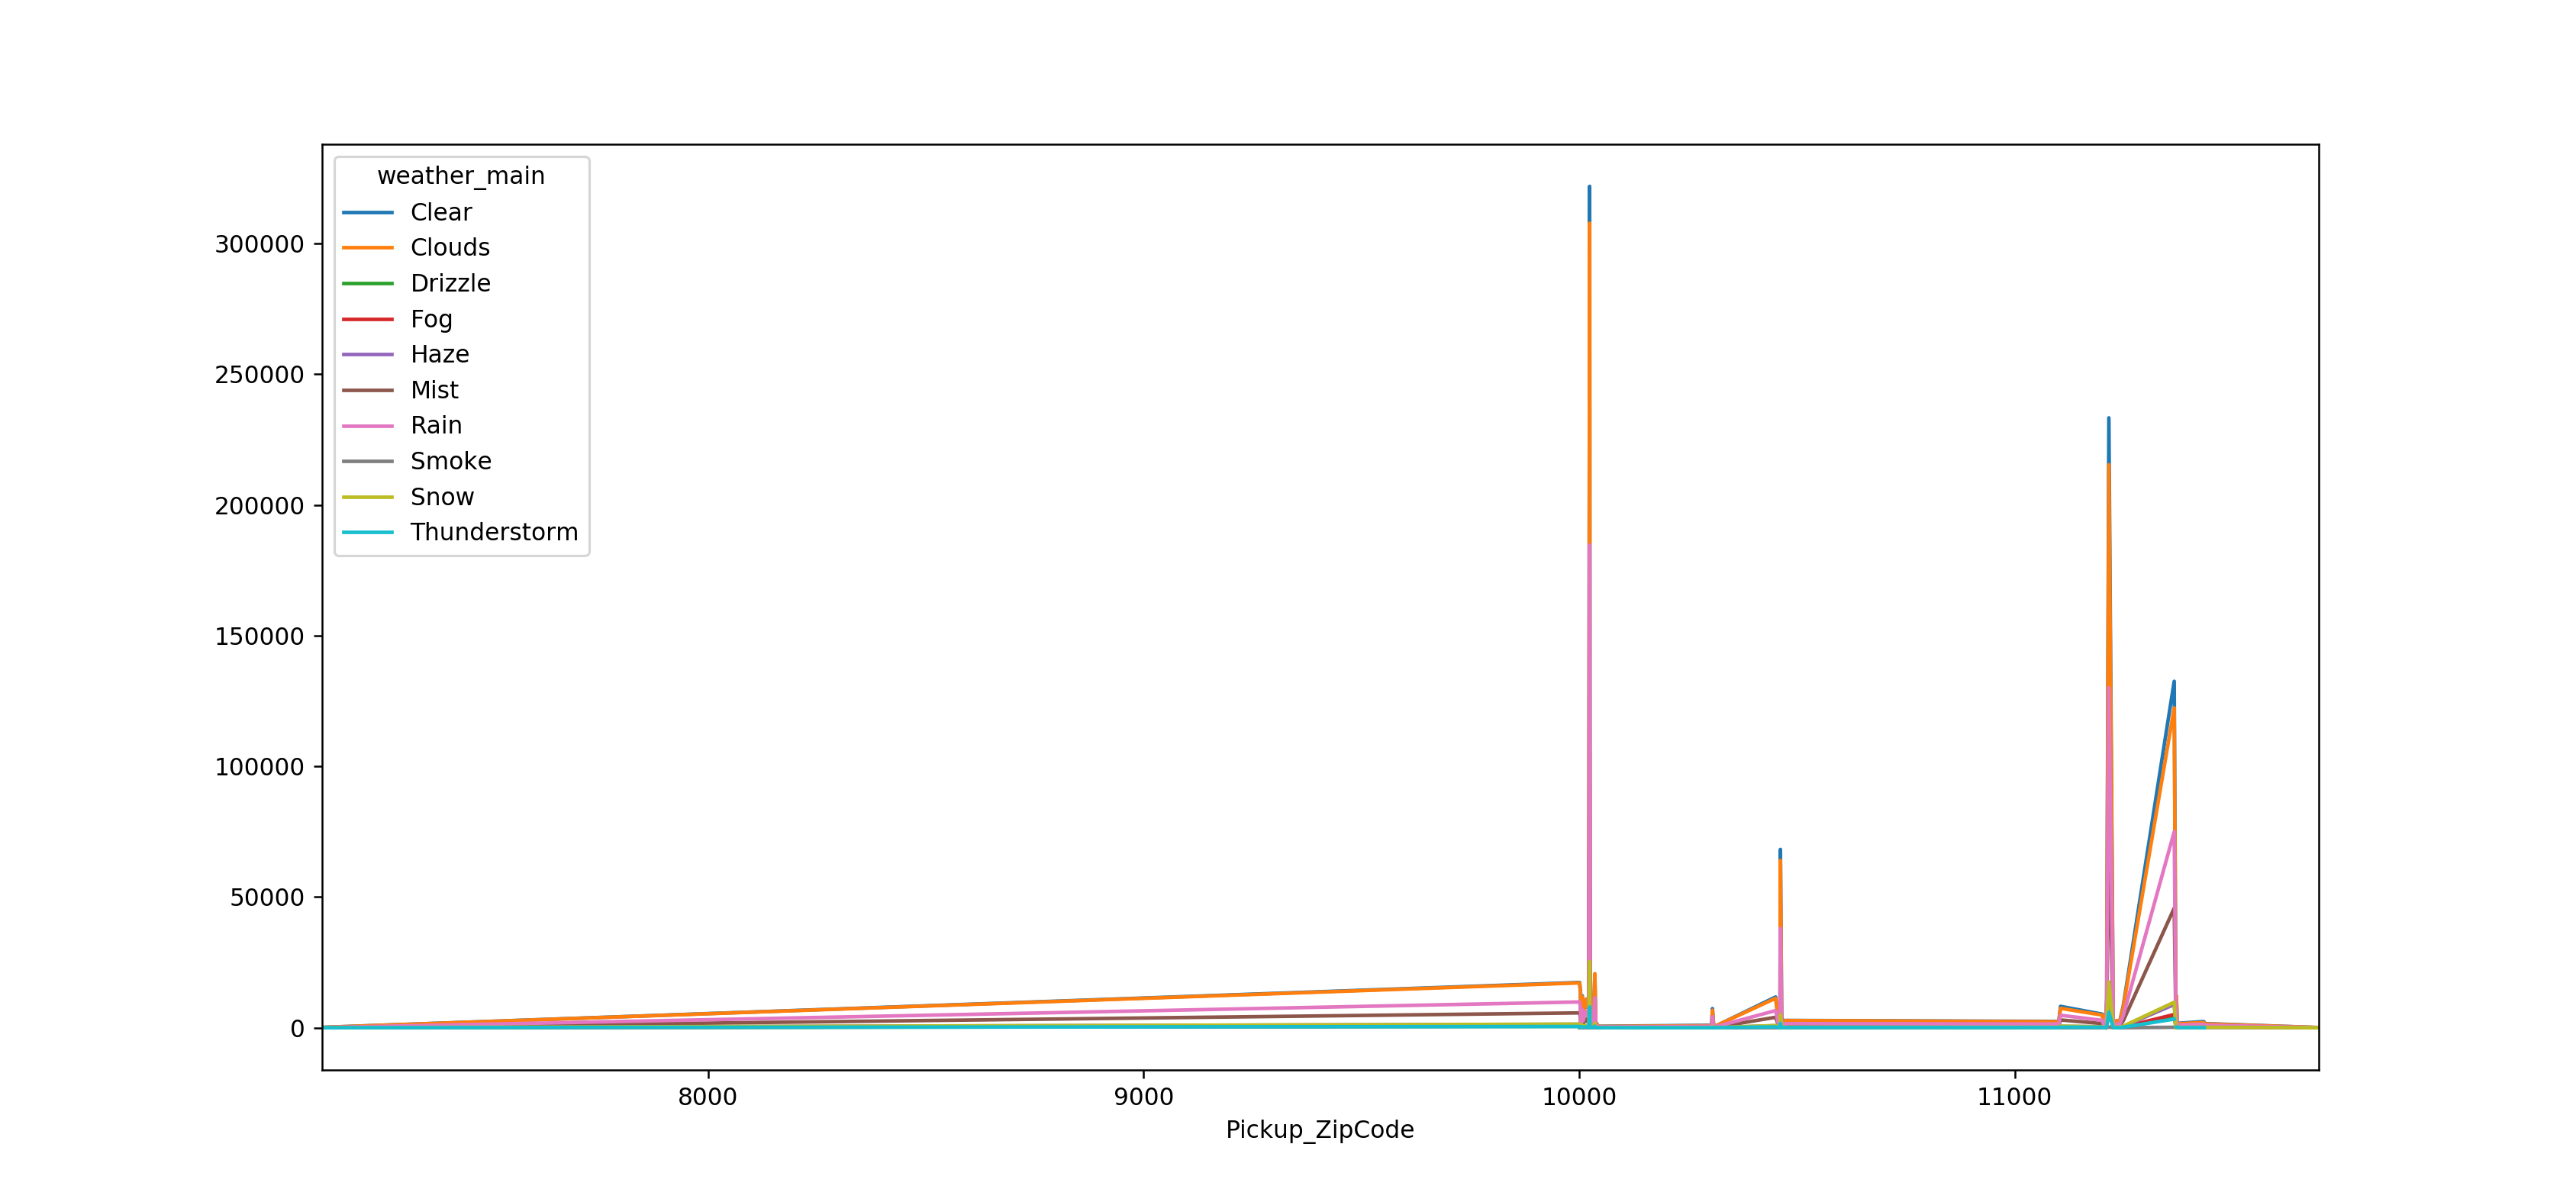

In [20]:
fig2, ax = plt.subplots(figsize=(15,7))
# use unstack()
src_df.groupby(['Pickup_ZipCode','weather_main']).count()['Trip_Duration'].unstack().plot(ax=ax)